In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [2]:
train_set = pd.read_csv(r'data\train_submission.csv')
test_set = pd.read_csv(r'data\test_without_labels.csv')

# DATA EXPLORATION

In [3]:
total_train = len(train_set)
print(f'train_set presents {total_train} phrases')
labels = train_set.Label.value_counts()
total_languages = len(labels)
print(f'train_set presents {total_languages} languages')

above_200 = sum(labels>=200)
above_100 = sum(labels>=100)-above_200
above_10 = sum(labels>=10)-sum(labels>=100)
less_10=sum(labels<10)

print(f'{int(100*above_200/total_languages)}% languages have 200 or more sentences.')
print(f'{int(100*above_100/total_languages)}% languages have between 100 and 199 sentences.')
print(f'{int(100*above_10/total_languages)}% languages have between 10 and 99 sentences.')
print(f'{int(100*less_10/total_languages)}% have less than 10 sentences')

train_set presents 190599 phrases
train_set presents 389 languages
92% languages have 200 or more sentences.
0% languages have between 100 and 199 sentences.
2% languages have between 10 and 99 sentences.
3% have less than 10 sentences


In [4]:
from tf_idf import separate_words
corpus = []
for lang, df in train_set.groupby('Label'):
    doc = []
    word_count=0
    for phrase in df.Text:
        doc += separate_words(phrase)
        word_count += len(doc)
    doc = ' '.join(doc)
    corpus.append({'langue': lang, 'text': doc, 'word_count': word_count})

In [5]:
corpus = pd.DataFrame(corpus)
less_than_million = 100*len(corpus['word_count'][corpus['word_count']<1000000])/len(corpus)
print(f"{less_than_million}% of languages have less than a million words")

8.740359897172237% of languages have less than a million words


<Axes: xlabel='word_count', ylabel='Count'>

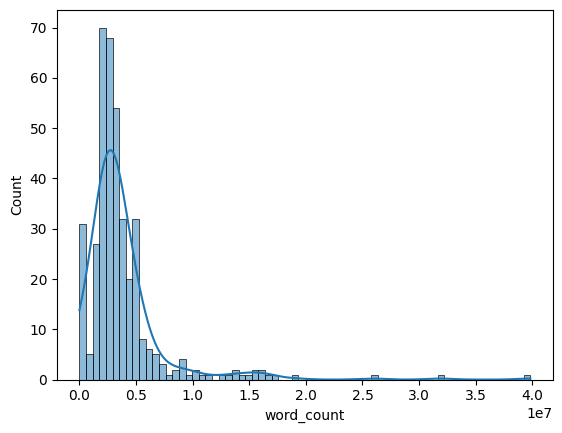

In [6]:
sns.histplot(corpus['word_count'], kde=True)

In [7]:
most_spoken_languages = [
    "eng",  # English
    "cmn",  # Mandarin Chinese
    "hin",  # Hindi
    "spa",  # Spanish
    "fra",  # French
    "arb",  # Standard Arabic
    #"ben",  # Bengali
    "por",  # Portuguese
    #"rus",  # Russian
    "urd"   # Urdu
]
most_spoken_languages = int(100*labels[most_spoken_languages].sum()/total_train)
print(most_spoken_languages, '% of the dataset top 10 most_spoken_languages')


2 % of the dataset top 10 most_spoken_languages


99 % of sentences have more than 150 words in test_set


<Axes: xlabel='Length', ylabel='Count'>

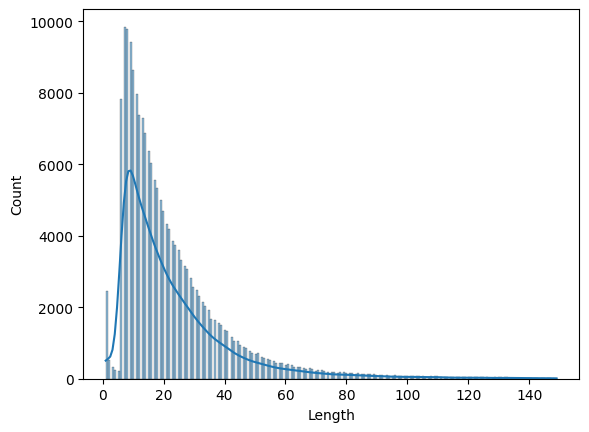

In [8]:
total_test = len(test_set)
test_set['Length']=test_set.Text.apply(lambda x:len(x.split(' ')))
print(int(100*sum(test_set.Length<150)/total_test), '% of sentences have more than 150 words in test_set')
sns.histplot(test_set.Length[test_set.Length<150], kde=True)

# Result Analysis

In [ ]:
import pandas as pd
from result_analysis import generate_language_info_table

train_set = pd.read_csv(r'data/train_submission.csv')
y_true = pd.read_csv(r'data/y_true_test.csv')
y_pred = pd.read_csv(r'data/y_pred_test.csv')

from sklearn.metrics import accuracy_score
accuracy_score(y_pred['Label'], y_true['Label'])


In [24]:
language_data = generate_language_info_table(y_pred, y_true, train_set)
print(language_data.is_roberta.value_counts())
language_data.describe()

is_roberta
False    318
True      71
Name: count, dtype: int64


,f1_score,sentence_count,size_gib,tokens_m,word_count
count,375.000000,389.000000,71.000000,71.000000,389.000000
mean,0.884188,488.686375,22.188732,2892.497183,13372.393316
std,0.147602,175.178964,45.174612,7757.154028,9207.610943
min,0.000000,1.000000,0.100000,5.000000,7.000000
25%,0.821825,500.000000,0.550000,53.000000,8181.000000
50%,0.942308,500.000000,3.300000,248.000000,11532.000000
75%,0.990291,500.000000,24.450000,1834.500000,16440.000000
max,1.000000,1500.000000,300.800000,55608.000000,63922.000000


The bool is_roberta indicates whether the language is listed as one of the 100 languages on which RoBERTa XML was trained

In [26]:
language_data_numeric = language_data[['f1_score', 'is_roberta', 'sentence_count', 'size_gib',
       'tokens_m', 'word_count']]
n = len(language_data_numeric[language_data_numeric['word_count']<10e3])
print(n, "languages with less than a thousand words")
print(f"Correlation for those {n} languages :")
language_data_numeric[language_data_numeric['word_count']<10e3].corr()

144 languages with less than a thousand words
Correlation for those 144 languages


,f1_score,is_roberta,sentence_count,size_gib,tokens_m,word_count
f1_score,1.000000,-0.029301,0.179066,-0.238983,-0.296981,0.219560
is_roberta,-0.029301,1.000000,0.259437,NaN,NaN,0.261615
sentence_count,0.179066,0.259437,1.000000,NaN,NaN,0.856108
size_gib,-0.238983,NaN,NaN,1.000000,0.972383,-0.048665
tokens_m,-0.296981,NaN,NaN,0.972383,1.000000,-0.048308
word_count,0.219560,0.261615,0.856108,-0.048665,-0.048308,1.000000


In [27]:
print(f"Correlation for all languages :")
language_data_numeric.corr()

Correlation for all languages :


,f1_score,is_roberta,sentence_count,size_gib,tokens_m,word_count
f1_score,1.000000,-0.035709,-0.012834,-0.128612,-0.197268,0.047572
is_roberta,-0.035709,1.000000,0.222997,NaN,NaN,0.159151
sentence_count,-0.012834,0.222997,1.000000,-0.164081,-0.132795,0.571837
size_gib,-0.128612,NaN,-0.164081,1.000000,0.942804,-0.306479
tokens_m,-0.197268,NaN,-0.132795,0.942804,1.000000,-0.254049
word_count,0.047572,0.159151,0.571837,-0.306479,-0.254049,1.000000


In [29]:
language_data.sort_values(by='f1_score')[:20]

,f1_score,is_roberta,language,sentence_count,size_gib,tokens_m,word_count
iba,0.000000,False,NaN,10,NaN,NaN,205
ngl,0.000000,False,NaN,7,NaN,NaN,67
bos,0.437956,True,Bosnian,500,0.1,14.0,6786
sna,0.454545,False,NaN,500,NaN,NaN,12489
kin,0.459770,False,NaN,500,NaN,NaN,17024
hrv,0.463158,True,Croatian,500,20.5,3297.0,6846
nde,0.475000,False,NaN,500,NaN,NaN,11125
afb,0.478261,False,NaN,500,NaN,NaN,5604
ind,0.512821,True,Indonesian,500,148.3,22704.0,7068
ary,0.514851,False,NaN,500,NaN,NaN,6298


<Axes: xlabel='f1_score', ylabel='Count'>

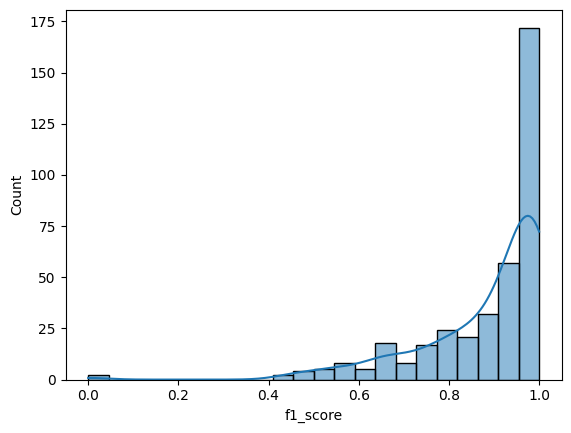

In [16]:
import seaborn as sns
sns.histplot(data=language_data, x="f1_score", kde=True)

